In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
## 9.1 군집 
from sklearn.datasets import load_iris

data = load_iris() 
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


그림 저장 classification_vs_clustering_plot


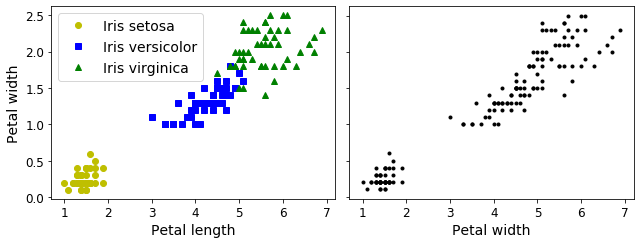

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=14)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal width", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

In [5]:
## (아래에서 설명할) 가우시안 혼합 모델은 3개의 클러스터를 잘 나눌 수 있다.
## 꽃잎 길이와 너비, 꽃받침 길이와 너비 4개의 특성을 모두 사용한다.

from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [6]:
## 각 클러스터를 하나의 클래스에 매핑해보자. 
## 이 매핑을 (책에서처럼) 하드 코딩하는 대신 (scipy.stats.mode() 함수를 사용해) 각 클러스터에서 가장 많은 클래스를 선택한다.

from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id
    
mapping

{1: 0, 2: 1, 0: 2}

In [7]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

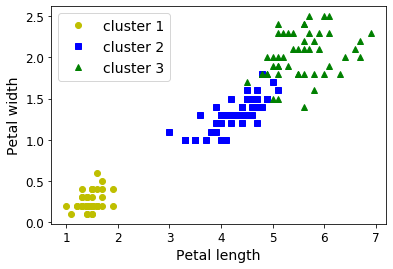

In [8]:
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="cluster 1")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="cluster 2")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [9]:
np.sum(y_pred==y)

145

In [10]:
np.sum(y_pred==y)/len(y_pred==y)
## 주의할 점 사이킷런 알고리즘이 이따금 업데이트되기 때문에 이 노트북의 결과가 책과 조금 다를 수 있다. 

0.9666666666666667

In [11]:
## 9.1.1 k-평균

from sklearn.datasets import make_blobs

In [12]:
blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]        
    ]
)

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [13]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                 cluster_std=blob_std, random_state=7)

In [14]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

그림 저장 blobs_plot


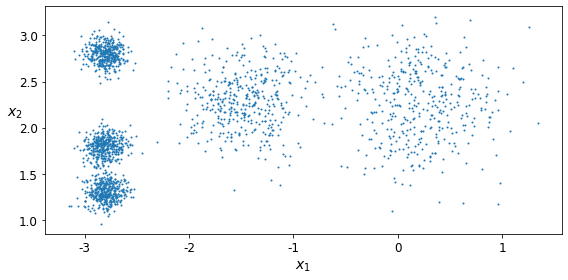

In [15]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

In [16]:
## 훈련과 예측
## 이 데이터셋에 k-평균 알고리즘 훈련, 이 알고리즘은 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당

from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [17]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [18]:
type(y_pred)

numpy.ndarray

In [19]:
y_pred is kmeans.labels_

True

In [20]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [21]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [22]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [23]:
## 결정경계를 그려보자 이 그림은 보로노이 다이어그램이다.

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)
    

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
        
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

그림 저장 voronoi_plot


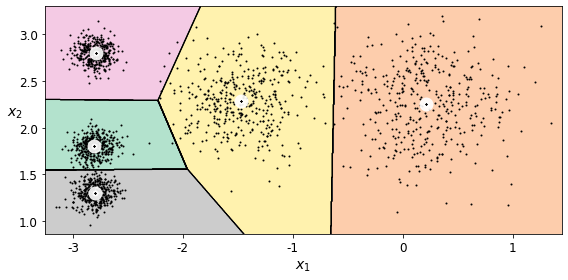

In [24]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

In [25]:
## 하드 군집, 소프트 군집

kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [26]:
np.linalg.norm(np.tile(X_new, (1,k)).reshape(-1, k, 2) -kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [27]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

그림 저장 kmeans_algorithm_plot


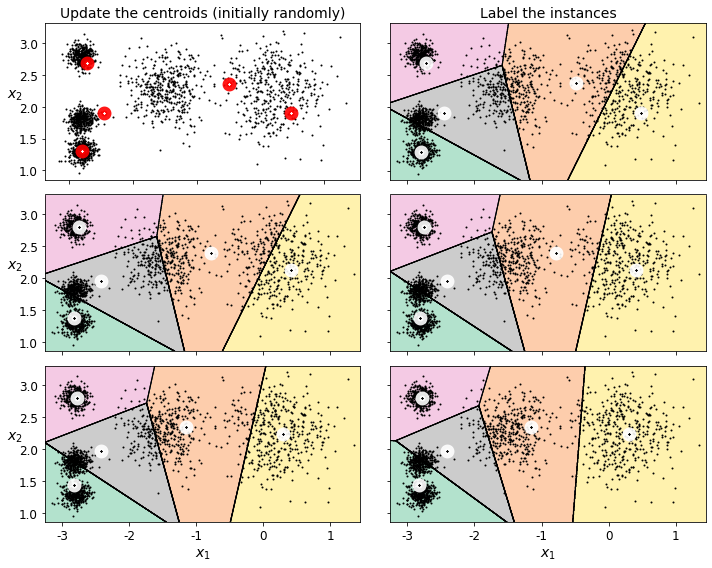

In [28]:
plt.figure(figsize=(10,8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

In [29]:
## k평균의 변동성 확인
## 원래 k평균 알고리즘에서는 센트로이드가 그냥 랜덤하게 초기화되고 알고리즘은 단순히 한번씩 반복하여 앞서 본 것처럼 점차 센트로이드 개선
## 하지만 이 방식의 문제점은 k평균을 여러번 시행하면 매우 결과를 얻게 된다. 

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize=(10, 3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)
        
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

그림 저장 kmeans_variability_plot


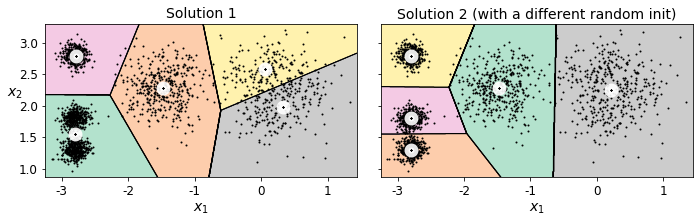

In [30]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

In [31]:
## 이너셔 
## 최선의 모델을 선택하려면 k 평균 모델의 성능을 평가할 방법이 필요하다. 그러나 군집은 비지도 학습이므로 타깃이 없다. 
## 하지만 적어도 각 샘플과 센트로이드 사이의 거리는 측정 가능하다. 이것이 이너셔 지표의 아이디어이다! 

kmeans.inertia_

211.5985372581684

In [32]:
## 이너셔는 각 훈련 샘플과 가장 가까운 센트로이드 사이의 제곱 거리의 합으로 쉽게 검증할 수 있다.

X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816805

In [33]:
## score() 메서드는 음의 이너셔를 반환한다. 왜 음수 반환하나요? 사이킷런의 score()메서드는 항상 "큰 값이 좋은것" 규칙을 따라야 하므로

kmeans.score(X)

-211.5985372581684

In [34]:
## 다중 초기화 
## 변동성 이슈를 해결하는 한 방법은 단순히 k평균 알고리즘을 랜덤 초기화를 다르게 하여 여러 번 실행하고 가장 작은 이너셔를 선택 
## 예를 들면 앞에 두 모델의 이너셔는 아래와 같다. 

kmeans_rnd_init1.inertia_

219.43539442771402

In [35]:
kmeans_rnd_init2.inertia_

211.5985372581684

In [36]:
## 여기서 볼 수 있듯이 앞서 훈련한 "좋은" 모델보다 이너셔가 더 높다. 즉 더 나쁘다는걸 의미한다. 
## n_init 매개변수를 지정하면 사이킷런은 원래 알고리즘을 n_init 번 실행하고 이너셔가 가장 작은 솔루션을 선택, 이 매개변수의 기본값 10 

kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10, algorithm="full", random_state=42)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=42)

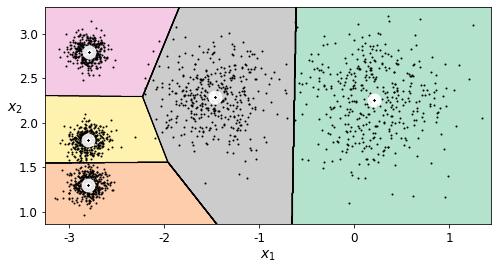

In [37]:
## 여기에서 볼 수 있듯이 결국 처음 만들었던 모델을 얻었다. 이 모델이 최적의 k평균 결과로 보인다.(k=5로 가정하고 이너셔를 기준일때)
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [38]:
## 센트로이드 초기화 방법 
## 센트로이드를 완전히 랜덤하게 초기화하는 대신 David Arthur와 Sergei Vassilvitskii가
## 2006년 논문에서 제안한 다음 알고리즘을 사용해 초기화하는 것이 더 좋습니다

KMeans()

KMeans()

In [39]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

In [40]:
## k평균 속도 개선

%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

95.2 ms ± 4.37 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [41]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

62 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [42]:
## 미니배치 k평균 
## 
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


MiniBatchKMeans(n_clusters=5, random_state=42)

In [43]:
minibatch_kmeans.inertia_

211.65239850433204

In [44]:
## 데이터셋이 메모리에 다 들어가지 못하면 가장 간단한 방법은 이전 장의 점진적 PCA에서 했던 것처럼 memmap 클래스를 사용하는 것이다. 
## 먼저 MNIST 데이터를 로드

import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

In [46]:
## memmap에 데이터 기록

filename="my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [47]:
import os
os.system("export OMP_NUM_THREADS=1")
os.environ["OMP_NUM_THREADS"] = "1"
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  "MiniBatchKMeans is known to have a memory leak on "


MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

In [48]:
## 만약 데이터가 너무 커서 memmap를 사용 할 수 없다면 문제는 더 복잡해진다. 배치 로드하는 함수를 만들어 보자(실전에선 디스크에서 데이터
## 로드한다고 한다.)

def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [49]:
## 한 번에 하나의 배치를 모델에 주입하여 훈련할 수 있다. 또한 여러 번 초기화를 수행하고 이너셔가 가장 낮은 모델을 선택

np.random.seed(42)

In [50]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
import numpy as np
np.set_num_threads = 2
OMP_NUM_THREADS=2
k = 5
n_init = 10
n_iterations = 100
batch_size = 100 
init_size = 500 # 1kmeans++ 초기화를 위한 충분한 데이터 전달??
evaluate_on_last_n_iters = 10 
best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)
    
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
            
    
    if (best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

In [51]:
import multiprocessing
multiprocessing.cpu_count()

8

In [52]:
best_kmeans.score(X)

-211.62571878891143

In [53]:
## 미니배치 K-평균이 일반 K-평균보다 훨씬 빠르다.
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

57.9 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
import os
os.environ["OMP_NUM_THREADS"] = "4"
import numpy as np
np.set_num_threads = 4
OMP_NUM_THREADS=4

%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

56.7 ms ± 2.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


In [55]:
## 월내는 MiniBatch가 더 빨라야 하지만 빌어먹을 메모리 누수 현상이 발생한다. 어떻게 처리해야되지... 정말 고민이지만 생각나는 대로 
## 새로운 방법들을 적용해보자 

from timeit import timeit

In [56]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42) 
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals()) # globals()는 코드를 실행할 이름 공간을 지정. 
    times[k-1, 1] = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals()) 
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

1/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

2/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

3/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

4/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

5/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

6/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

7/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

8/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

9/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

10/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

11/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

12/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

13/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

14/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

15/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

16/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

17/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

18/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

19/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

20/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

21/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

22/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

23/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

24/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

25/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

26/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

27/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

28/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

29/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

30/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

31/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

32/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

33/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

34/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

35/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

36/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

37/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

38/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

39/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

40/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

41/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

42/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

43/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

44/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

45/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

46/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

47/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

48/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

49/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

50/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

51/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

52/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

53/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

54/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

55/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

56/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

57/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

58/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

59/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

60/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

61/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

62/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

63/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

64/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

65/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

66/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

67/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

68/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

69/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

70/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

71/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

72/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

73/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

74/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

75/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

76/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

77/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

78/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

79/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

80/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

81/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

82/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

83/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

84/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

85/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

86/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

87/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

88/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

89/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

90/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

91/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

92/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

93/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

94/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

95/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

96/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

97/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

98/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

99/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

100/100

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1047: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting 

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


그림 저장 Mini-Batch-KMeans vs KMeans


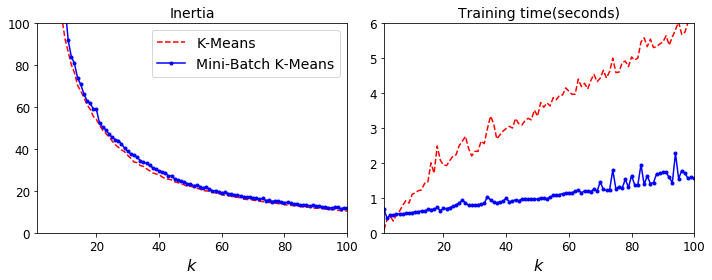

In [57]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-Batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-Batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time(seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("Mini-Batch-KMeans vs KMeans")
plt.show()

그림 저장 bad_n_clusters_plot


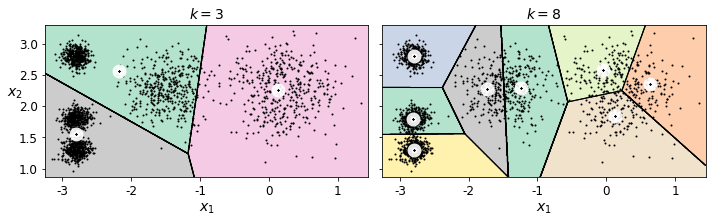

In [58]:
## 최저의 클러스터 갯수 찾기 

kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

In [59]:
## 두 모델 다 그리 좋아보이지는 않는다. 이너셔도 확인해보자 

kmeans_k3.inertia_

653.2167190021553

In [60]:
kmeans_k8.inertia_

119.11983416102879

In [61]:
## k가 증가할수록 이너셔가 작아지므로 단순히 이너셔가 작은 k를 선택하면 안된다. 실제 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드
## 에 더 가깝게 된다. k에 대한 이너셔를 그래프로 그리고 결과 그래프를 조사해보자 

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
               for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

그림 저장 inertia vs k


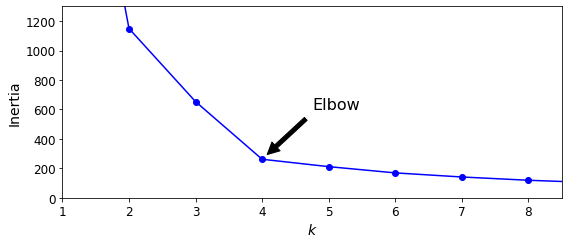

In [62]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.annotate('Elbow', 
            xy=(4, inertias[3]),
            xytext=(0.55, 0.55),
            textcoords='figure fraction',
            fontsize=16, 
            arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.axis([1, 8.5, 0, 1300])
save_fig("inertia vs k")
plt.show()

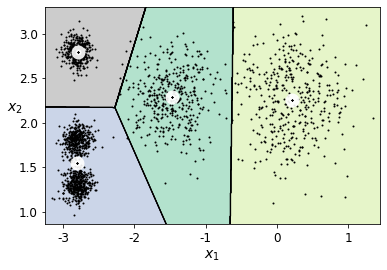

In [63]:
## 이 그림에서 보이듯이 k=4에서 엘보우가 있다. 이 값보다 클러스터가 작으면 나쁘다. 이보다 많아도 별로다. 그러므로 k=4가 좋은 결과이다.
## 물론 완벽한 결과는 아니다. 왼쪽 아래 두 클러스터가 하나의 클러스터로 간주된게 별로다.
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [64]:
## 또 다른 방법은 실루엣 점수이다. 
## k에 대한 실루엣 점수를 그래프로 그려보자

from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

In [65]:
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

그림 저장 silhouette_score vs k


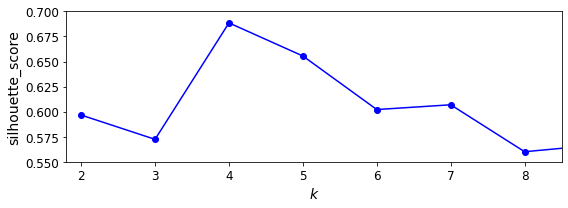

In [66]:
plt.figure(figsize=(8, 3))
plt.plot(range(2,10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

save_fig("silhouette_score vs k")
plt.show()

그림 저장 variable silhouette value_plot


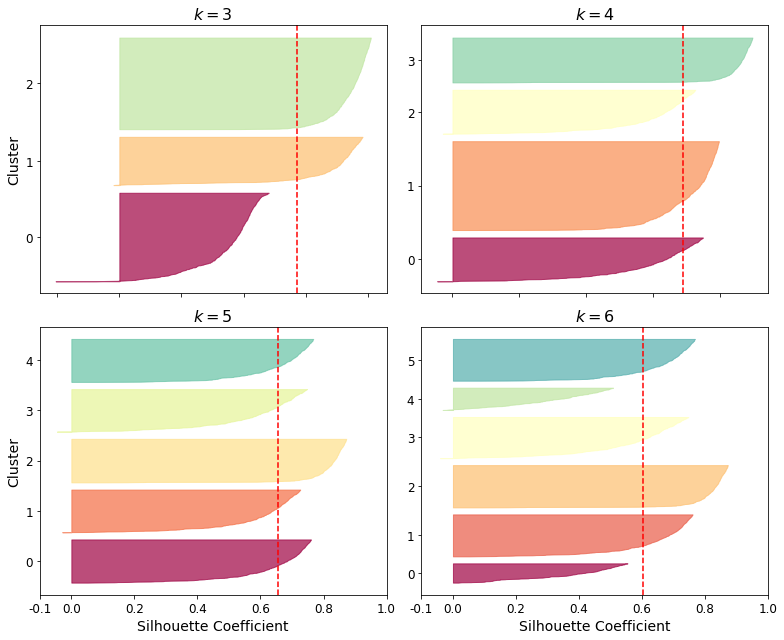

In [67]:
## 위의 그래프는 앞선 이너셔 그래프 보다 많은 의미를 가지고 있다. 앞선 그래프에선 k=4만 좋은 선택이라는걸 알 수 있었는데 
## 위의 실루엣 점수 그래프에선 5도 꽤나 괜찮은 선택이라는걸 알 수 있고 그리고 아래는 
## 모든 샘플의 실루엣 계수를 할당된 클러스터와 실루엣 값으로  정렬하여 그리면 훨씬 많은 정보를 얻을 수 있다. 
## 이를 실루엣 다이어그램 이라고 한다.

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k-2)
    
    y_pred = kmeans_per_k [k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred==i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor = color, edgecolor = color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
        
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False) ## params 매개변수 
        
    
    plt.axvline(x=silhouette_scores[k-2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("variable silhouette value_plot")
plt.show()

In [68]:
## 여기에서 보이듯이 k=5가 제일 좋은 선택이다. 왜냐면 모든 클러스터 크기가 비슷하고 평균 실루엣 점수를 나타내는 선을 전부 넘었다.

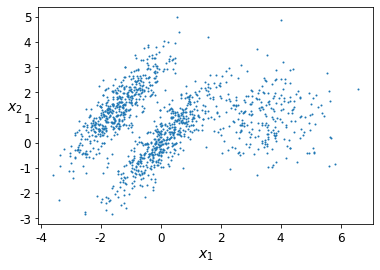

In [69]:
## k-평균의 한계 
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
plot_clusters(X)

In [70]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

그림 저장 bad_kmeans_plot


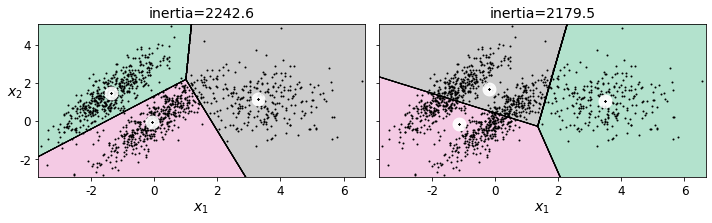

In [71]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("inertia={:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("inertia={:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()

In [72]:
## k 평균은 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다. 
## 이런 타원형 클러스터에서는 가우시안 혼합 모델이 잘 작동한다.

In [73]:
## 9.1.3 군집을 사용한 이미지 분할

# 무당벌레 이미지를 다운로드
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x20e027e2748>)

In [74]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [75]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [76]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

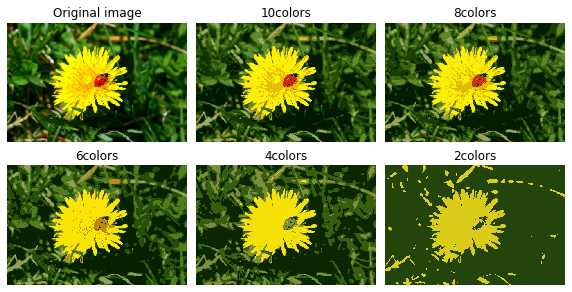

In [77]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{}colors".format(n_clusters))
    plt.axis('off')

In [78]:
## 9.1.4 군집을 사용한 전처리

from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [79]:
## 훈련 세트와 테스트 세트로 나눈다. 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [80]:
## 그다음 로지스틱 회귀 모델을 훈련

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [81]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

In [82]:
## 좋다. 기준값으로 약 96.9% 정확도를 얻었다. k 평균을 전처리 단계로 사용해 더 좋아지는지 확인해보자 
## 파이프라인을 만들어 먼저 훈련 세트를 50개의 클러스터로 모은다. 그 다음 이미지를 50개의 클러스터까지 거리로 바꾼다. 그런다음 
## 로지스틱 회귀 모델을 적용

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [83]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

In [84]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.28571428571428414

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.2s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   2.7s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=37; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=37; total time=   2.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=39; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=39; total time=   3.4s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=70; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.2s
[CV] END ..............................kmeans__n_clusters=70; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=71; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=71; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=71; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=72; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=72; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=72; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=73; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=73; total time=   3.7s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [86]:
## 최적의 클러스터 개수
grid_clf.best_params_

{'kmeans__n_clusters': 88}

In [87]:
## 파이프라인의 성능
grid_clf.score(X_test, y_test)

0.9822222222222222

In [88]:
## k=95 개의 클러스터 사용 시 정확도가 상승, 테스트 세트에서 97.78%정도 달성

In [89]:
## 9.1.5 군집을 사용한 준지도 학습
## 군집을 사용하는 또 다른 사례는 준지도 학습이다. 레이블이 없는 데이터가 많고 레이블이 있는 데이터가 적을 때 사용 
## 일단 숫자 데이터셋에서 레이블 된 50개 샘플에 로지스틱 회귀 모델 훈련
## 참고, 사이킷런 0.24버전에서 준지도 학습을 위한 SelfTrainingClassifier가 추가

n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [90]:
## 정확도가 너무 낮다. 83.33%인데 생각해보면 전체 데이터셋을 사용할 때보다 낮은 정확도가 나온 것이 당연하다.
## 개선방법을 생각해보면 먼저 훈련 세트를 50개의 클러스터로 모으고 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾는다.
## 이런 이미지를 대표 이미지(representative image)라고 부른다.

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx] 

그림 저장 representative_images_diagram


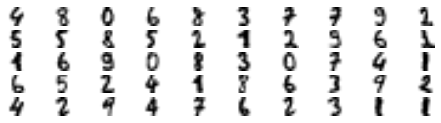

In [91]:
## 대표 이미지 출력

plt.figure(figsize=(8,2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot( k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
    
save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [92]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [93]:
y_representative_digits = np.array([
  4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [94]:
## 이 데이터셋은 레이블이 있는 샘플이 50개뿐이지만 완전히 랜덤한 샘플이 아니라 각 샘플은 클러스터의 대표 이미지이다. 
## 성능이 더 나은지 확인해 보자

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

In [95]:
## 92.22%로 꽤나 올랐다. 샘플에 레이블을 부여하는건 비용이 많이 들고 어렵다. 특히 전문가가 수동으로 처리해야 할 때 그렇다.
## 따라서 무작위 샘플 대신 대표 샘플에 레이블을 할당하는 것이 좋은 방법이다.
## 여기서 더 향상 시킬 수 있다. 바로 이 레이블을 동일한 클러스터에 있는 모든 샘플로 전파하는 것이다. 이를 
## 레이블 전파(label propagation) 라고 부른다.

y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [96]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [97]:
log_reg.score(X_test, y_test)

0.9333333333333333

In [98]:
## 성능이 92.22에서 93.33으로 조금 올랐다. 센트로이드에 가까운 샘플에만 레이블을 전파하는 것이 나을지 모르겠다. 
## 왜냐하면 전체 클러스터에 전파하면 일부 이상치를 포함하기 때문입니다. 레이블을 센트로이드에 가까운 
## 20번째 백분위수까지만 전파해보자

percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1 

In [99]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [100]:
log_reg = LogisticRegression(multi_class= "ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [101]:
log_reg.score(X_test, y_test)

0.94

In [102]:
## 좀 더 괜찮아 졌다. 레이블된 샘플 50개만으로(평균적으로 클래스당 5개 샘플) 94%의 정확도들 얻었다.
## 레이블이 있는 전체 데이터셋에서 훈련한 로지스틱 회귀 성능(97.78%)에 좀 가까워졌다. 성능이 이렇게 좋은 이유는 전파된 레이블이 
## 실제로 매우 좋기 때문이다. 

np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

In [103]:
## 모델과 훈련 세트를 지속적으로 향상하기 위해 다음 단계로 능동 학습을 몇 번 반복할 수 있다.
## 1. 분류기의 확신이 부족한 샘플에 수동으로 레이블을 부여합니다. 가능하면 다른 클러스터에서 샘플을 선택
## 2. 추가된 레이블을 사용해 새로운 모델을 훈련

In [104]:
## 9.1.6 DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [105]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [106]:
len(dbscan.core_sample_indices_)

808

In [107]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [108]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [109]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [110]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [111]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_,  dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={: .2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

그림 저장 dbscan_plot


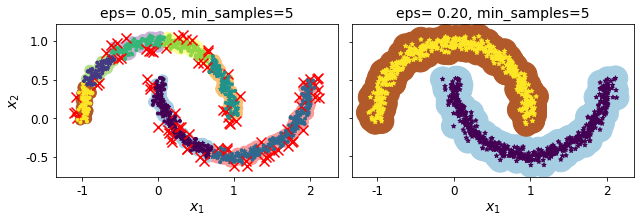

In [112]:
## 그림 9-14
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [113]:
dbscan = dbscan2

In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [115]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [116]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

그림 저장 cluster_classification_plot


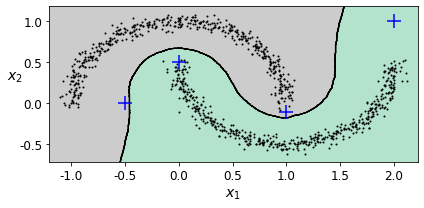

In [117]:
## 그림 9-15
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [118]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

In [119]:
## 9.1.7 다른 군집 알고리즘
## 스펙트럼 군집

from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [120]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [121]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [122]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma=()".format(sc.gamma), fontsize=14)

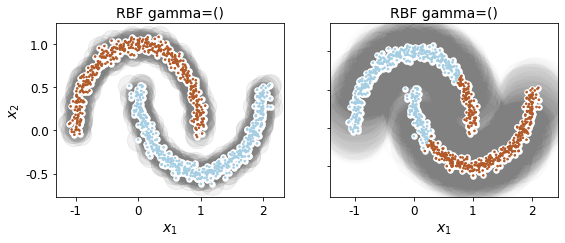

In [123]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

In [124]:
## 병합 군집

from sklearn.cluster import AgglomerativeClustering
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [125]:
def learned_parameters(estimator):
    return [attrib for attrib in dir (estimator)
           if attrib.endswith("_") and not attrib.startswith("_")]

In [126]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [127]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

In [128]:
## 9.2 가우시안 혼합

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [129]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [130]:
## EM 알고리즘이 추정한 파라미터 확인 
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [131]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [132]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [133]:
## 알고리즘이 실제 수렴했는지?

gm.converged_

True

In [134]:
## 몇번 반복했는지? 

gm.n_iter_

4

In [135]:
## 이 모델을 이용해 각 샘플이 속한 클러스터(하드 군집)나 클러스터에 속할 확률을 예측(소프트 군집)할 수 있다.
## 하드 군집을 위해서 predict, 소프트 군집을 위해서 predict_proba 메서드 사용 

gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [136]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

In [137]:
## 이 모델은 생성 모델이다. 이 모델에서 새로운 샘플을 만들 수 있다.

X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [138]:
y_new

array([0, 0, 1, 2, 2, 2])

In [139]:
## 각 클러스터에서 순서대로 샘플링 되었다.
## score_samples 이용하여 로그확률밀도(PDF, Probability density function)를 추정할 수 있다.
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

In [140]:
## 전체 공간에 대해 이 PDF를 적분하면 1이 되는지 확인해 보자. 클러스터 주위로 큰 사각형을 정하고 작은 사각형의 그리드로 자르고 
## 그 다음 작은 사각형에서 샘플이 생성될 확률의 근삿값을 계산해 보자(작은 사각형의 면적과 PDF를 곱하고 이 확률을 모두 더한다.) 
## 결괏값은 1에 매우 가깝다.

resolution = 100 
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999215021

In [141]:
## 만들어진 결정 경계(파선)와 밀도 등고선을 그려보자

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

그림 저장 gaussian_mixtures_plot


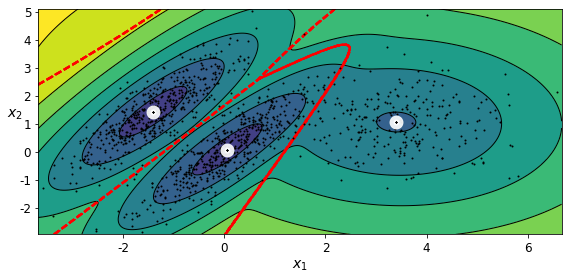

In [142]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

In [143]:
## 사이킷런에서는 convariance_type 매개변수를 이용하여 이 알고리즘이 찾을 공분산 행렬에 제약을 추가할 수 있다. 
## full - 제약이 없다(기본 값), 모든 클러스터가 어떠한 형태의 타원이라도 될 수 있다. 
## spherical - 모든 클러스터가 원형이다. 지름은 다를 수 있다.(즉, 분산이 다르다.)
## diag - 클러스터는 크기에 상관없이 어떤 타원형도 가능, 타원의 축은 좌표 축과 나란해야 한다.(즉, 공분산 행렬이 대각 행렬이어야 한다.)
## tied - 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가진다.(즉, 모든 클러스터는 동일한 공분산 행렬을 공유한다.)
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)

gm_full.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)
gm_tied.fit(X)

GaussianMixture(covariance_type='tied', n_components=3, n_init=10,
                random_state=42)

In [144]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

그림 저장 covariance_type_plot


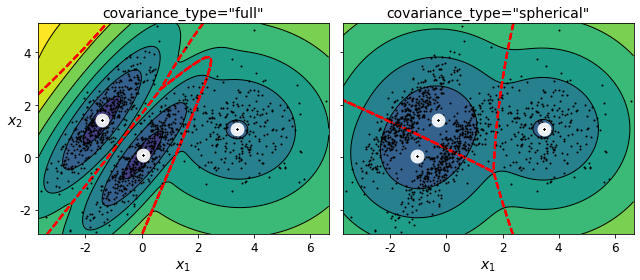

In [145]:
compare_gaussian_mixtures(gm_full, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

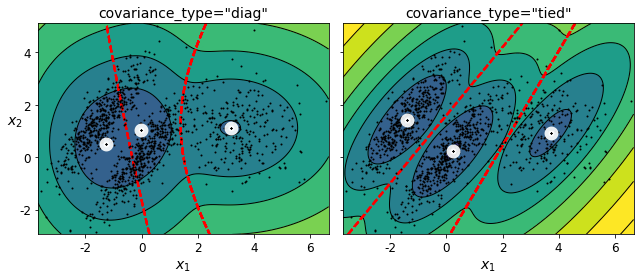

In [146]:
compare_gaussian_mixtures(gm_diag, gm_tied, X)
plt.tight_layout()
plt.show()

In [147]:
## 9.2.1 가우시안 혼합을 사용한 이상치 탐지 
## 이상치 탐지는 보통과 많이 다른 샘플을 감지하는 작업이다. 가우시안 혼합 모델을 이상치 탐지에 사용하는 방법은 밀도가 낮은 지역에 
## 있는 모든 샘플을 이상치로 볼 수 있다. 사용할 밀도 임계값을 정해서 사용한다. 
## 예를 들어 결함 제품을 감지하려는 제조회사는 4%를 사용한다. 밀도 임계값을 이 값으로 설정하면 밀도가 낮은 지역에 있는 
## 샘플의 4%를 얻을 수 있다. 


densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

그림 저장 mixture_anomaly_detection_plot


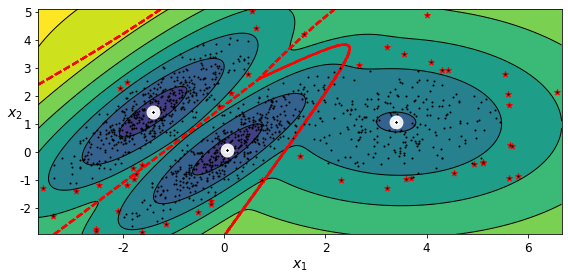

In [148]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

In [149]:
## 9.2.2 클러스터 개수 선택하기  
## 모델 선택 
## k-평균에서는 이너셔나 실루엣 점수를 사용해 적절한 클러스터 개수를 선택한다. 그러나 가우시안 혼합에서는 이런 지표들을 사용 불가 
## 이런 지표들은 클러스터가 타원형이거나 크기가 다를 때 안정적이지 않기 때문 
## 대신 BIC(Bayesian information criterion), AIC(Akaike information criterion)와 같은 이론적 정보 기준을 최소화 하는 모델을 찾는다.

gm.bic(X)

8189.747000497186

In [150]:
gm.aic(X)

8102.521720382148

In [151]:
gm.aic(X)

8102.521720382148

In [153]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [154]:
bic, aic

(8189.747000497186, 8102.521720382148)

In [155]:
n_params

17

In [156]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "
C:\Users\MJ\anaconda3\lib\site-pac

In [157]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


그림 저장 aic_bic_vs_k_plot


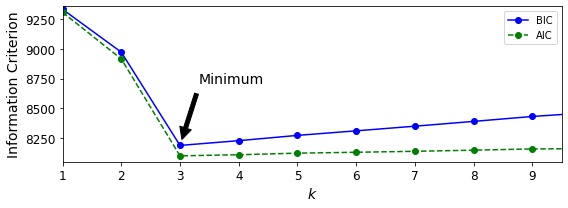

In [158]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("aic_bic_vs_k_plot")
plt.show()

In [159]:
## 클러스터 개수와 convariance_type 하이퍼 파라미터의 최적의 조합을 찾아 보자

min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "
C:\Users\MJ\anaconda3\lib\site-pac

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "
C:\Users\MJ\anaconda3\lib\site-pac

In [160]:
best_k

'full'

In [ ]:
best_covariance_type

In [162]:
## 9.2.3 베이즈 가우시안 혼합 모델 
## 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture 클래스 사용 가능
## 최적의 클러스터 보다 큰 컴포넌트 개수 지정, 이 알고리즘은 자동으로 불필요한 클러스터를 제거한다.

from sklearn.mixture import BayesianGaussianMixture

In [165]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [166]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

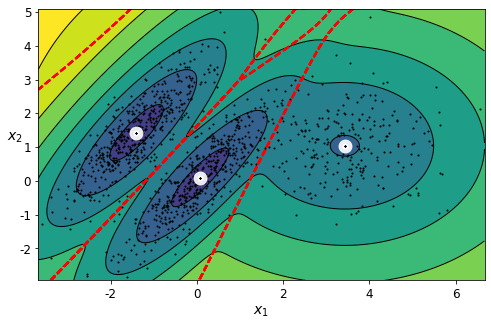

In [167]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [169]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1, 
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)

nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [170]:
np.round(bgm_low.weights_, 2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [171]:
np.round(bgm_high.weights_, 2)

array([0.01, 0.18, 0.27, 0.11, 0.01, 0.01, 0.01, 0.01, 0.37, 0.01])

그림 저장 mixture_concentration_prior_plot


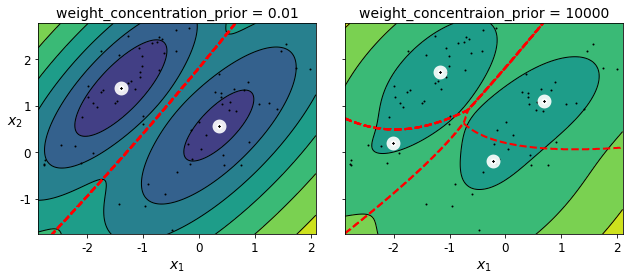

In [174]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentraion_prior = 10000", fontsize=14)
save_fig("mixture_concentration_prior_plot")
plt.show()

In [175]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [176]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

그림 저장 moons_vs_bgm_plot


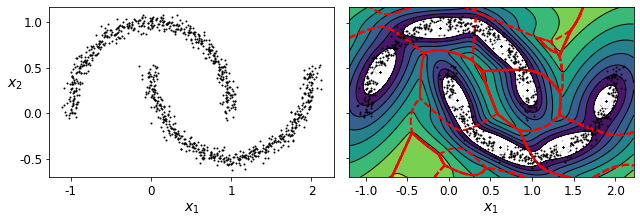

In [177]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("moons_vs_bgm_plot")
plt.show()

In [178]:
## 가능도 함수 
## 확률과 가능도는 종종 구별 없이 사용된다. 그러나 통계학에서 이 둘은 다른 의미를 가진다.
## 확률은 미래 출력 x가 얼마나 그럴듯한지 설명, 가능도는 출력 x를 알고 있을 때 특정 파라미터 값이 얼마나 그럴듯한지 설명한다.

그림 저장 likelihood_function_plot


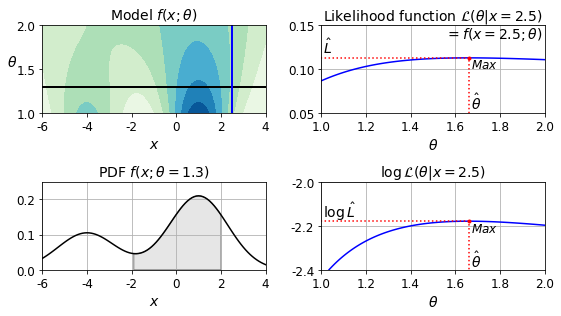

In [179]:
## 그림 9-20

from scipy.stats import norm
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4.5))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

save_fig("likelihood_function_plot")
plt.show()